# TD4 - Explainability AI

#### Matias OTTENSEN
#### Tiphaine KACHKACHI
#### Manon GARDIN

# Our dataset 

Petite description du dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import sklearn
from sklearn.datasets import load_diabetes

In [21]:
df = pd.read_csv('archive/US_Accidents_March23.csv', sep=',')

## Observe data

In [4]:
df.shape

(7728394, 46)

We have a great number of lines in our dataset.\
Also we have 46 columns, we probably won't need every one of them. Let's see their name :

In [5]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [6]:
df.head(10)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day
5,A-6,Source2,3,2016-02-08 07:44:26,2016-02-08 08:14:26,40.100590,-82.925194,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day
6,A-7,Source2,2,2016-02-08 07:59:35,2016-02-08 08:29:35,39.758274,-84.230507,NaN,NaN,0.00,...,False,False,False,False,False,False,Day,Day,Day,Day
7,A-8,Source2,3,2016-02-08 07:59:58,2016-02-08 08:29:58,39.770382,-84.194901,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day
8,A-9,Source2,2,2016-02-08 08:00:40,2016-02-08 08:30:40,39.778061,-84.172005,NaN,NaN,0.00,...,False,False,False,False,False,False,Day,Day,Day,Day
9,A-10,Source2,3,2016-02-08 08:10:04,2016-02-08 08:40:04,40.100590,-82.925194,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

As the dataframe is huge (almost 3 gb), we decided to work on another version of this dataframe, just to have a sample that we could work on esier:

In [22]:
halfsize=int((df.shape[0])/2)
df_half= df.iloc[:halfsize,:]
print(df_half.shape)

(3864197, 46)


Variables like Street, City, Zipcode and County won't be useful to keep, because there are too many distinct values.\
The columns Bump, Traffic_calming, Turning_loop, Give_Way, No_Exit, Roundabout can be deleted because they take only one value (all false).\
The variable Country only takes US so we can delete it.\
We can also delete some columns like Airport_Code that won't be relevant.

In [23]:
# Delete the columns we don't need 
df = df.drop(['Street', 'City', 'Description','County', 'Zipcode', 'Country', 'Bump', 'Traffic_Calming', 'Turning_Loop', 'Give_Way', 'No_Exit', 'Roundabout', 'Airport_Code'], axis=1)

In [10]:
df.head(10)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Crossing,Junction,Railway,Station,Stop,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,False,True,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,False,True,Day,Day,Day,Day
5,A-6,Source2,3,2016-02-08 07:44:26,2016-02-08 08:14:26,40.100590,-82.925194,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day
6,A-7,Source2,2,2016-02-08 07:59:35,2016-02-08 08:29:35,39.758274,-84.230507,NaN,NaN,0.00,...,False,False,False,False,False,False,Day,Day,Day,Day
7,A-8,Source2,3,2016-02-08 07:59:58,2016-02-08 08:29:58,39.770382,-84.194901,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day
8,A-9,Source2,2,2016-02-08 08:00:40,2016-02-08 08:30:40,39.778061,-84.172005,NaN,NaN,0.00,...,False,False,False,False,False,False,Day,Day,Day,Day
9,A-10,Source2,3,2016-02-08 08:10:04,2016-02-08 08:40:04,40.100590,-82.925194,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day


In [12]:
df.describe

<bound method NDFrame.describe of                 ID   Source  Severity           Start_Time  \
0              A-1  Source2         3  2016-02-08 05:46:00   
1              A-2  Source2         2  2016-02-08 06:07:59   
2              A-3  Source2         2  2016-02-08 06:49:27   
3              A-4  Source2         3  2016-02-08 07:23:34   
4              A-5  Source2         2  2016-02-08 07:39:07   
...            ...      ...       ...                  ...   
7728389  A-7777757  Source1         2  2019-08-23 18:03:25   
7728390  A-7777758  Source1         2  2019-08-23 19:11:30   
7728391  A-7777759  Source1         2  2019-08-23 19:00:21   
7728392  A-7777760  Source1         2  2019-08-23 19:00:21   
7728393  A-7777761  Source1         2  2019-08-23 18:52:06   

                    End_Time  Start_Lat   Start_Lng   End_Lat    End_Lng  \
0        2016-02-08 11:00:00  39.865147  -84.058723       NaN        NaN   
1        2016-02-08 06:37:59  39.928059  -82.831184       NaN        

# Data Cleaning

Missing values:

In [13]:
print(df.isnull().sum())

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
State                          0
Timezone                    7808
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Crossing                       0
Junction                       0
Railway                        0
Station                        0
Stop                           0
Traffic_Signal                 0
Sunrise_Sunset             23246
Civil_Twil

There are missing values, so, what can we do about it?

First, we create a new dataframe to secure the first one if we ever delete the wring values

In [25]:
newdf = df

In [26]:
#for the end lat/lng : we will fill the NAN by the start lat/lng:

newdf['End_Lat']=newdf['End_Lat'].fillna(newdf['Start_Lat'])
newdf['End_Lng']=newdf['End_Lng'].fillna(newdf['Start_Lng'])

#for the streets/Cities/Description/zipcode/timezone/Weather_Condition/Sunrise_Sunset/Civil_Twilight/Nautical_Twilight
#and Astronomical_Twilight, we just write "unknown", 
#as we do not want to give fake infoomations to the person reading

newdf['Timezone']=newdf['Timezone'].fillna('unknown')
newdf['Weather_Condition']=newdf['Weather_Condition'].fillna('unknown')
newdf['Sunrise_Sunset']=newdf['Sunrise_Sunset'].fillna('unknown')
newdf['Civil_Twilight']=newdf['Civil_Twilight'].fillna('unknown')
newdf['Nautical_Twilight']=newdf['Weather_Condition'].fillna('unknown')
newdf['Astronomical_Twilight']=newdf['Astronomical_Twilight'].fillna('unknown')

# for the weather timestamp, we put now's date
newdf['Weather_Timestamp']=newdf['Weather_Timestamp'].fillna(datetime.now())

#temperature/Wind_Chill(F)/Humidity(%)/Pressure(in)/Visibility(mi)/Wind_Speed(mph)/Precipitation(in): we put the mean
newdf['Temperature(F)']=newdf['Temperature(F)'].fillna(newdf['Temperature(F)'].mean())
newdf['Wind_Chill(F)']=newdf['Wind_Chill(F)'].fillna(newdf['Wind_Chill(F)'].mean())
newdf['Humidity(%)']=newdf['Humidity(%)'].fillna(newdf['Humidity(%)'].mean())
newdf['Pressure(in)']=newdf['Pressure(in)'].fillna(newdf['Pressure(in)'].mean())
newdf['Visibility(mi)']=newdf['Visibility(mi)'].fillna(newdf['Visibility(mi)'].mean())
newdf['Wind_Speed(mph)']=newdf['Wind_Speed(mph)'].fillna(newdf['Wind_Speed(mph)'].mean())
newdf['Precipitation(in)']=newdf['Precipitation(in)'].fillna(newdf['Precipitation(in)'].mean())


# for the airport code, we write '###' in the missing values
newdf['Wind_Direction']=newdf['Wind_Direction'].fillna('###')

In [27]:
print(newdf.isnull().sum())

ID                       0
Source                   0
Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
End_Lat                  0
End_Lng                  0
Distance(mi)             0
State                    0
Timezone                 0
Weather_Timestamp        0
Temperature(F)           0
Wind_Chill(F)            0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Direction           0
Wind_Speed(mph)          0
Precipitation(in)        0
Weather_Condition        0
Amenity                  0
Crossing                 0
Junction                 0
Railway                  0
Station                  0
Stop                     0
Traffic_Signal           0
Sunrise_Sunset           0
Civil_Twilight           0
Nautical_Twilight        0
Astronomical_Twilight    0
dtype: int64


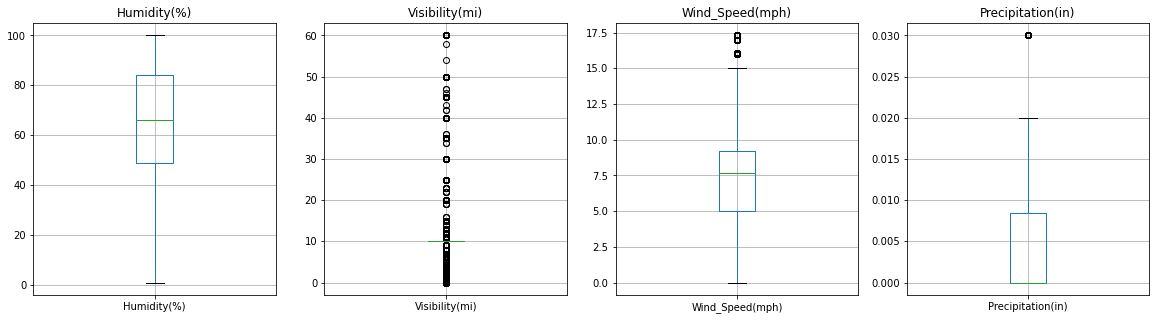

In [32]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))

newdf[['Humidity(%)']].boxplot(ax=axes[0])
axes[0].set_title('Humidity(%)')

newdf[['Visibility(mi)']].boxplot(ax=axes[1])
axes[1].set_title('Visibility(mi)')

newdf[['Wind_Speed(mph)']].boxplot(ax=axes[2])
axes[2].set_title('Wind_Speed(mph)')

newdf[['Precipitation(in)']].boxplot(ax=axes[3])
axes[3].set_title('Precipitation(in)')

plt.show()

as we can see, there are a lot of outliers in the dataset, so let's remove them

<Axes: >

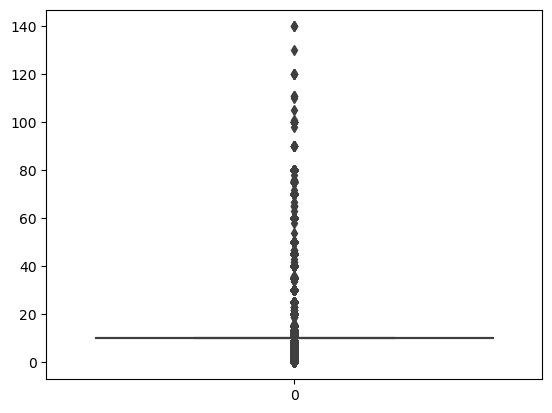

In [17]:
sns.boxplot(newdf['Visibility(mi)'])

Looks like there is a lot of outliers, so we decide to replace some outliers with the mean value

C:\Users\manon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Visibility(mi)'>

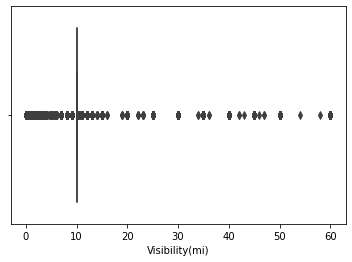

In [28]:
moyenne_colonne = newdf['Visibility(mi)'].mean()

newdf.loc[newdf['Visibility(mi)'] > 60, 'Visibility(mi)'] = 60

sns.boxplot(newdf['Visibility(mi)'])

As we can see, actually, there is a huge amount of "10" values, so the other values are more rare, so we can decide to keep it this way or to delete them. We chose to delete them, as they are not representative

Let's deal with every columns that contains outliers now.

5.0
10.0
5.0
0.0
0.00840720980710487
0.00840720980710487
52.0
71.0
19.0
50.0
76.0
26.0


C:\Users\manon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Temperature(F)'>

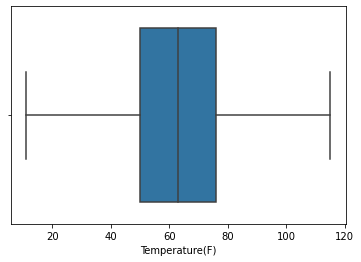

In [31]:
Q1= newdf['Wind_Speed(mph)'].quantile(0.25)
Q3= newdf['Wind_Speed(mph)'].quantile(0.75)
IQR = Q3 - Q1
moyenne = newdf['Wind_Speed(mph)'].mean()

threshold = 1.5

newdf.loc[(df['Wind_Speed(mph)'] < Q1 - threshold * IQR), 'Wind_Speed(mph)'] = moyenne
newdf.loc[(df['Wind_Speed(mph)'] > Q3 + threshold * IQR), 'Wind_Speed(mph)'] = moyenne

#precipitaion

Q1= newdf['Precipitation(in)'].quantile(0.25)
Q3= newdf['Precipitation(in)'].quantile(0.75)
IQR = Q3 - Q1

threshold = 3


moyenne_precipitation = newdf['Precipitation(in)'].median()
newdf.loc[(df['Precipitation(in)'] < Q1 - threshold * IQR), 'Precipitation(in)'] = moyenne_precipitation
newdf.loc[(df['Precipitation(in)'] > Q3 + threshold * IQR), 'Precipitation(in)'] = moyenne_precipitation

#wind chill
Q1= newdf['Wind_Chill(F)'].quantile(0.25)
Q3= newdf['Wind_Chill(F)'].quantile(0.75)
IQR = Q3 - Q1

threshold = 1.5


moyenne_windchill = newdf['Wind_Chill(F)'].median()
newdf.loc[(df['Wind_Chill(F)'] < Q1 - threshold * IQR), 'Wind_Chill(F)'] = moyenne_windchill
newdf.loc[(df['Wind_Chill(F)'] > Q3 + threshold * IQR), 'Wind_Chill(F)'] = moyenne_windchill

#Temperature

Q1= newdf['Temperature(F)'].quantile(0.25)
Q3= newdf['Temperature(F)'].quantile(0.75)
IQR = Q3 - Q1

threshold = 1.5


moyenne_temp = newdf['Temperature(F)'].median()
newdf.loc[(df['Temperature(F)'] < Q1 - threshold * IQR), 'Temperature(F)'] = moyenne_temp
newdf.loc[(df['Temperature(F)'] > Q3 + threshold * IQR), 'Temperature(F)'] = moyenne_temp

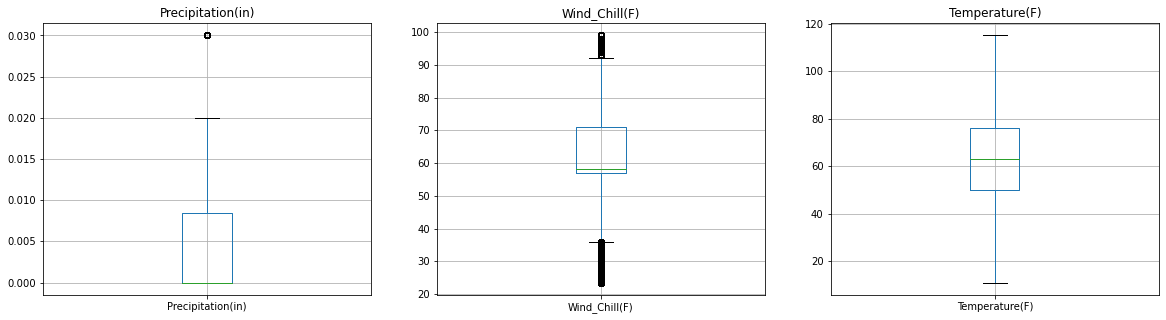

In [33]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

newdf[['Precipitation(in)']].boxplot(ax=axes[0])
axes[0].set_title('Precipitation(in)')

newdf[['Wind_Chill(F)']].boxplot(ax=axes[1])
axes[1].set_title('Wind_Chill(F)')

newdf[['Temperature(F)']].boxplot(ax=axes[2])
axes[2].set_title('Temperature(F)')

plt.show()

# Question 3

The variables we can predict are probably the severity of an accident, and maybe a start time.

Based on our intuition, we think that the most important variables to predict the severity of an accident would be the weather condition variables like Humidity, Wind Speed, Pressure, etc. And probably the time of the day like Day or Night.

## Univariate Analysis

Let's do a histogram

(array([  67366.,       0.,       0., 6156981.,       0.,       0.,
        1299337.,       0.,       0.,  204710.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

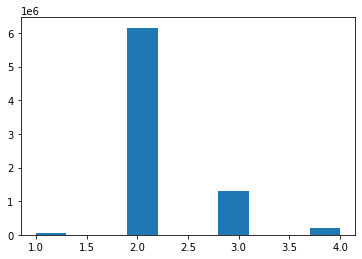

In [34]:
plt.hist(newdf['Severity'])

(array([2370595.,       0.,       0.,       0.,       0., 5334553.,
              0.,       0.,       0.,   23246.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

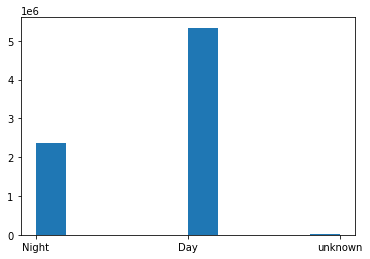

In [36]:
plt.hist(newdf['Sunrise_Sunset'])

KeyboardInterrupt: 

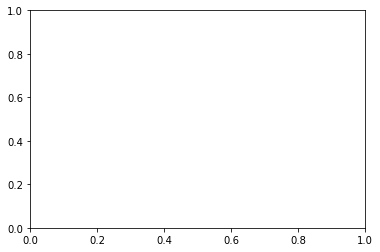

In [38]:
#plt.scatter(newdf.index, newdf['Start_Time'])
#plt.show()